<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Machine_Learning/blob/main/machinelearning_regresaolinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"><h2 align="center">Análise Exploratória de Dados </h2></h2>

Data Scientist Jr.: Karina Gonçalves Soares

Link de estudo:

* [Machine Learning: Regressão](https://github.com/EddyGiusepe/Machine_Learning/blob/main/3_ML_Regression.ipynb)


#Regressão Linear

A tarefa de REGRESSÃO consiste em encontrar uma função que nos permita predizer o valor de uma ou mais variáveis a partir de uma ou mais características (ou features). Um exemplo seria predizer o preço de uma casa a partir de seu número de habitações, metros quadrados, etc. O modelo mais simples para este tipo de tarefa é o modelo de Regressão Linear.
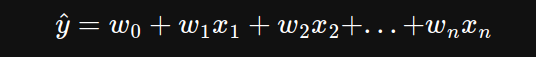

onde image.png é o valor predito, image.png parâmetros do modelo ou chamados pesos também (aqui também está incluso o bias image.png ),  image.png é o número de características (features) e image.png é a característica image.png Este modelo também é conhecido como PERCEPTRON, a base das REDES NEURONAIS. Treinar um modelo de Regressão Linear consiste em encontrar o conjunto de pesos,  image.png  que minimizem uma função de CUSTO. Neste caso de regressão linear, o Erro Quadrático Médio (MSE) é usado como medida de erro:

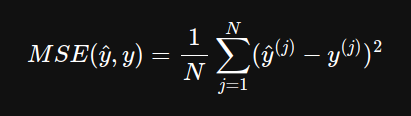

Onde image.png é o número de amostras em nosso conjunto de Dados, 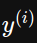 é o valor real, a etiqueta (ou ground truth) da amostra image.png

Vejamos um exemplo:

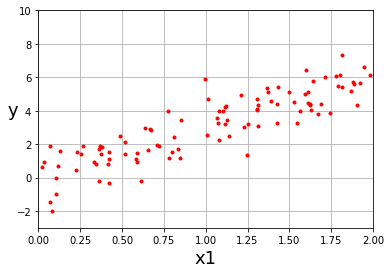

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100,1)
y = 3 * x + np.random.randn(100, 1)

plt.plot(x, y, "r.")
plt.xlabel('x1', fontsize = 18)
plt.ylabel('y', rotation =0, fontsize = 18)
plt.axis([0,2,-3,10])
plt.grid(True)
plt.show()

Neste caso temos apenas uma característica, x1, a partir da qual queremos predizer somente uma variável y (por exemplo o preço de uma casa em função de seus metros quadrados). Podemos usar o modelo de LinearRegression da biblioteca scikit-learn.

In [3]:
from sklearn.linear_model import LinearRegression

# Nosso modelo
lin_reg = LinearRegression()

# Ajustamos nosso modelo aos Dados
lin_reg.fit(x, y)

# Calculamos os coeficientes (as w_i)
lin_reg.intercept_, lin_reg.coef_# Bias (interceptar)

(array([0.0254736]), array([[3.02127872]]))

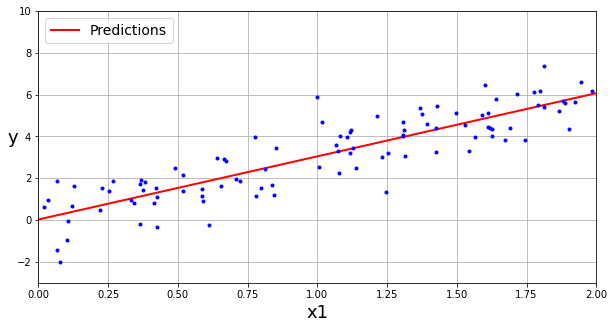

In [26]:
x_new = np.array([[0], [2]])  # Um novo Dado
# Logo fazemos a predição para esse novo Dado
y_predict = lin_reg.predict(x_new)

plt.figure(figsize = (10,5))
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(x, y, 'b.')
plt.xlabel('x1', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.axis([0,2,-3,10])
plt.show()

Como pode ver, este modelo é muito simples, eficiente e explicável. No entanto, se nossos Dados não seguem uma tendência linear o resultado que obteremos não será bom.

# Regressão Polinomial

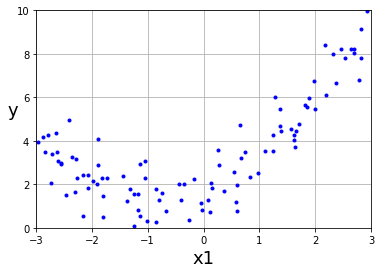

In [30]:
import numpy.random as  rnd
np.random.seed(42) # Isto é só para obter os mesmos resultados quando outro cientista reproduzir este script

m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1) 

plt.plot(x, y, 'b.')
plt.xlabel('x1', fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.grid(True)
plt.show()

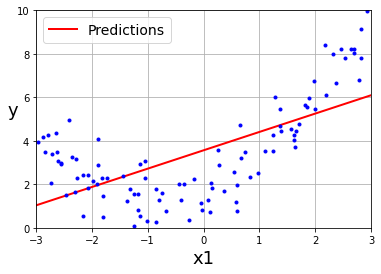

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

x_new = np.array([[-3],[3]])
y_predict = lin_reg.predict(x_new)

plt.plot(x_new, y_predict, 'r-', linewidth=2, label="Predictions")
plt.plot(x, y, 'b.')
plt.xlabel('x1', fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])
plt.grid(True)
plt.show()